# 데이터 원본
[데이터셋 : [Kaggle] Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/olistbr/brazilian-ecommerce)

### 라이브러리 로드

In [230]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [232]:
# 폰트 적용
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [233]:
font_family = get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [234]:
# 그래프 스타일 설정
# print(plt.style.avaiable)
# https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [235]:
path_dir = '/content/gdrive/MyDrive/Data Analysis/kaggle/e-commerce'
file_list = os.listdir(path_dir)
file_list

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'e-commerce_eda.ipynb']

In [236]:
pd.set_option('display.max_columns', None)

### 테이블 구조도

![data_schema](https://i.imgur.com/HRhd2Y0.png)

In [237]:
# 데이터 불러오기
orders = pd.read_csv(path_dir + '/olist_orders_dataset.csv')
order_items = pd.read_csv(path_dir + '/olist_order_items_dataset.csv')
customers = pd.read_csv(path_dir + '/olist_customers_dataset.csv')
geolocation = pd.read_csv(path_dir + '/olist_geolocation_dataset.csv')
payments = pd.read_csv(path_dir + '/olist_order_payments_dataset.csv')
reviews = pd.read_csv(path_dir + '/olist_order_reviews_dataset.csv')
sellers = pd.read_csv(path_dir + '/olist_sellers_dataset.csv')
products = pd.read_csv(path_dir + '/olist_products_dataset.csv')
product_category = pd.read_csv(path_dir + '/product_category_name_translation.csv')

# 테이블 정보

In [238]:
print('orders 크기:', orders.shape)
print('order_items 크기:', order_items.shape)
print('payments 크기:', payments.shape)
print('customers 크기:', customers.shape)
print('sellers 크기:', sellers.shape)
print('products 크기:', products.shape)
print('reviews 크기:', reviews.shape)
print('geolocation 크기:', geolocation.shape)

orders 크기: (99441, 8)
order_items 크기: (112650, 7)
payments 크기: (103886, 5)
customers 크기: (99441, 5)
sellers 크기: (3095, 4)
products 크기: (32951, 9)
reviews 크기: (99224, 7)
geolocation 크기: (1000163, 5)


## Orders

In [239]:
# 주문정보 테이블
print('orders 크기:', orders.shape)
orders.head()

orders 크기: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


주문번호, 구매자 id, 주문처리 상태, 주문시간, 주문승인시간, 발송날짜, 수령날짜, 수령예상일자 정보 등을 확인할 수 있다.

분석 해볼 수 있는 키워드
- 주문건수(연도별/월별/일별/요일별/시간대별)
- 주문처리 상태
- 주문부터 수령까지 리드타임

In [240]:
# 컬럼 정보
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [241]:
# 결측치 확인
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- order_approved_at : 아직 주문 승인이 안된 것
- order_delivered_carrier_date : 발송시작일
- order_delivered_customer_date : 고객에게 배송된 완료된 날짜

In [242]:
# 주문id 정보
orders['order_id'].nunique() 

99441

In [243]:
# 고객id 정보
orders['customer_id'].nunique()

99441

한 고객이 여러번 주문한 이력이 없다.

In [244]:
# 주문상태
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [245]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [246]:
orders[orders['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


In [247]:
# 날짜 변수 생성
orders['purchase_date'] = pd.to_datetime(orders['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")
orders['purchase_year_month'] = orders['purchase_date'].dt.strftime('%Y-%m')
orders['purchase_year'] = orders['purchase_date'].dt.year
orders['purchase_month'] = orders['purchase_date'].dt.month
orders['purchase_dow'] = orders['purchase_date'].dt.dayofweek
orders['purchase_hour'] = orders['purchase_date'].dt.hour

In [248]:
# 리드타임 관련 변수 생성
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format="%Y-%m-%d %H:%M:%S")
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format="%Y-%m-%d %H:%M:%S")
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format="%Y-%m-%d %H:%M:%S")

# 주문승인 시간 리드타임
orders['order_approved'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders['order_approved_leadtime'] = orders['order_approved'].apply(lambda x: x.seconds // 3600 + x.days * 24)

# 주문승인~배송시작 리드타임
orders['delivered_approved'] = orders['order_delivered_carrier_date'] - orders['order_approved_at']
orders['delivered_approved_leadtime'] = orders['delivered_approved'].apply(lambda x: x.seconds // 3600 + x.days * 24)

# 배송시작~배송완료 리드타임
orders['delivered_finished'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders['delivered_leadtime'] = orders['delivered_finished'].apply(lambda x: x.seconds // 3600 + x.days * 24)

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0


## Order_items

In [249]:
print('order_items 크기:', order_items.shape)
order_items.head()

order_items 크기: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


제품 가격, 배송비가 분리되어 있다.

In [250]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [251]:
order_items['order_id'].nunique()

98666

orders 테이블의 order_id가 99,441개인 것에 반해, order_items 테이블에는 98,666개로 개수가 좀 적은 것을 알 수 있다.

In [252]:
# 한 개의 주문 건에 몇개의 품목을 담았을까?
order_items['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

최대 20개의 품목을 결제한 고객도 있음

In [253]:
# order_item_id
order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

잘모르겠음

In [254]:
# 결제금액(total_price) 컬럼 생성
# order_items['total_amount'] = order_items['price'] + order_items['freight_value']
# order_items.head()

In [255]:
# sales = order_items.groupby(['order_id'], as_index=False)['total_amount'].sum()
# sales

In [256]:
# sales['total_amount'].sum()

In [257]:
# payments['payment_value'].sum()

payments 테이블의 결제금액 합계와 비교했을 때 조금 상이한 부분이 있다.

## Payments

In [258]:
print('payments 크기:', payments.shape)
payments.head()

payments 크기: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [259]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [260]:
payments['order_id'].nunique()

99440

1개의 order_id에 지불방법이 다양함

In [261]:
# payment_sequential : 구매횟수
payments['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [262]:
# payment_installments : 할부 결제
payments['payment_installments'].max()

24

24개월 할부 결제가 max 인것으로 보인다

In [263]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [264]:
# order_id 별 결제금액 계산
payment_values = payments.groupby(['order_id'], as_index=False)['payment_value'].sum()
payment_values

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [265]:
# orders 테이블과 merge
orders_df = pd.merge(orders, payment_values, how='left', on='order_id')

In [266]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0,28.62


- 구매횟수
- 결제방법
- 결제금액 구간별 할부결제 여부
- RFM 분석

## Customers

In [267]:
print('customers 크기:', customers.shape)
customers.head()

customers 크기: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


고객의 id, unique_id, zip_code, city, state 정보가 포함 되어있다.

In [268]:
#customer_id와 customer_unique_id의 차이

In [269]:
customers['customer_id'].nunique()

99441

In [270]:
customers['customer_unique_id'].nunique()

96096

customer_id는 unique 값이 없기 때문에 주문 건당 랜덤으로 생성되는 개별적인 주문번호 개념이고,  
customer_unique_id는 unique 값이 있는 것으로 보아 회원 id 개념으로 이해하면 될 것 같다.

In [271]:
# orders 테이블과 merge
orders_df = pd.merge(orders_df, customers, how='left', on='customer_id')

In [272]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


customer_unique_id가 있기 때문에 객단가를 산출할 수 있다.

## Selllers

In [273]:
print('sellers 크기:', sellers.shape)
sellers.head()

sellers 크기: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


customers 테이블과 동일한 zip_code, city, state 정보가 포함되어 있다.

## Products

In [274]:
print('products 크기:', products.shape)
products.head()

products 크기: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [275]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [276]:
# 결측치 정보
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### product_category

In [277]:
print('product_category 크기:', product_category.shape)
product_category.head()

product_category 크기: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [278]:
# 스페인어로 되어 있는 카테고리 이름을 영어로 변경해주기
products = pd.merge(products, product_category, how='left', on='product_category_name')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [279]:
products = products[['product_id', 'product_category_name_english', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [280]:
products.head()

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [281]:
products['product_category_name_english'].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

## Reviews

In [282]:
print('reviews 크기:', reviews.shape)
reviews.head()

reviews 크기: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


order_id를 기준으로 review_score를 merge해서 배송 리드타임과 리뷰 스코어의 상관관계를 확인해볼 수 있을 것이다.

In [283]:
orders_df = pd.merge(orders_df, reviews, how='left', on='order_id')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


## Geolocation

In [284]:
print('geolocation 크기:', geolocation.shape)
geolocation.head()

geolocation 크기: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## 탐색적 데이터 분석(EDA)

### 주문자 정보(거주지)

In [285]:
order_region = orders_df.groupby(['customer_state'], as_index = False)['order_id'].count().sort_values(by='order_id', ascending=False).head(10)
order_region

,customer_state,order_id
25,SP,41964
18,RJ,12930
10,MG,11706
22,RS,5506
17,PR,5064
23,SC,3651
4,BA,3397
6,DF,2160
7,ES,2043
8,GO,2037


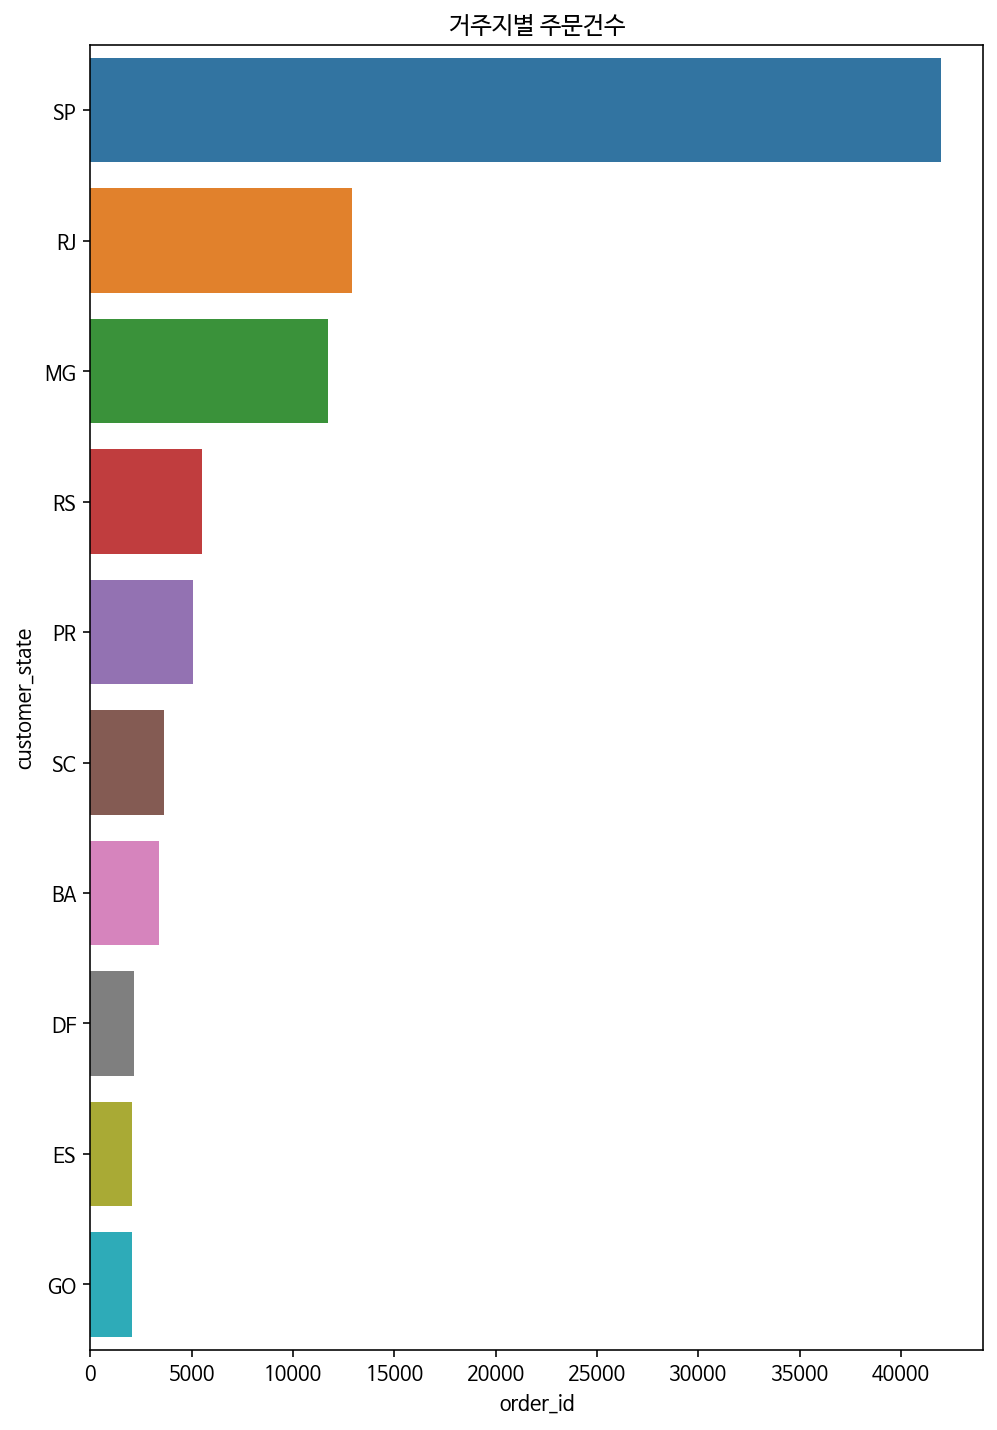

In [286]:
plt.figure(figsize=(8,12))
g = sns.barplot(data=order_region, y='customer_state', x='order_id')
plt.title('거주지별 주문건수')
plt.show()

상파울로, 리우데자네이루, 미나스제라이스, 리우그란지두술 등 순이다

### 주문처리 상태

In [287]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0


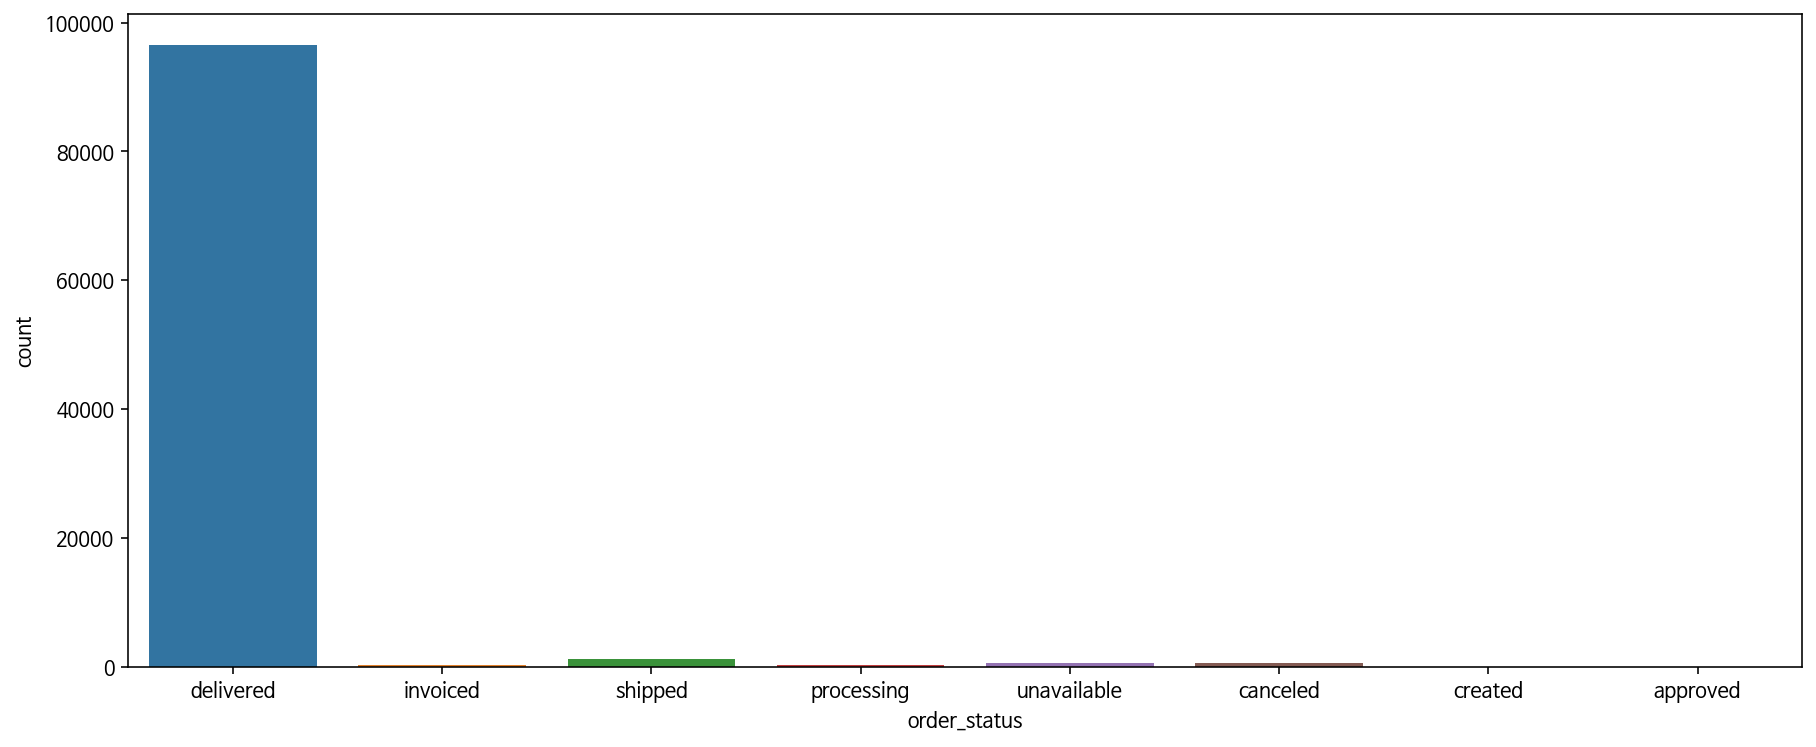

In [288]:
plt.figure(figsize=(15,6))
g = sns.countplot(data=orders, x='order_status')

In [289]:
orders.groupby(['purchase_year_month','order_status'], as_index=False)['order_status'].count()

,purchase_year_month,order_status
0,2016-09,2
1,2016-09,1
2,2016-09,1
3,2016-10,24
4,2016-10,265
...,...,...
131,2018-08,47
132,2018-08,7
133,2018-09,15
134,2018-09,1


In [290]:
orders['purchase_date'].max()

Timestamp('2018-10-17 17:30:18')

In [291]:
# 최근 3개월 주문처리 상태 확인
recent_orders = orders[orders['purchase_date'] >= '2018-09-01']
recent_orders.shape

(20, 20)

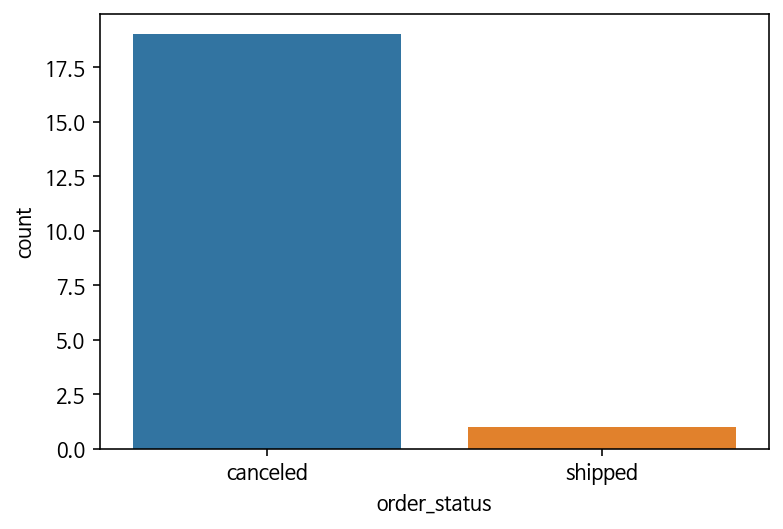

In [292]:
g = sns.countplot(data=recent_orders, x='order_status')

### 주문현황

In [293]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0


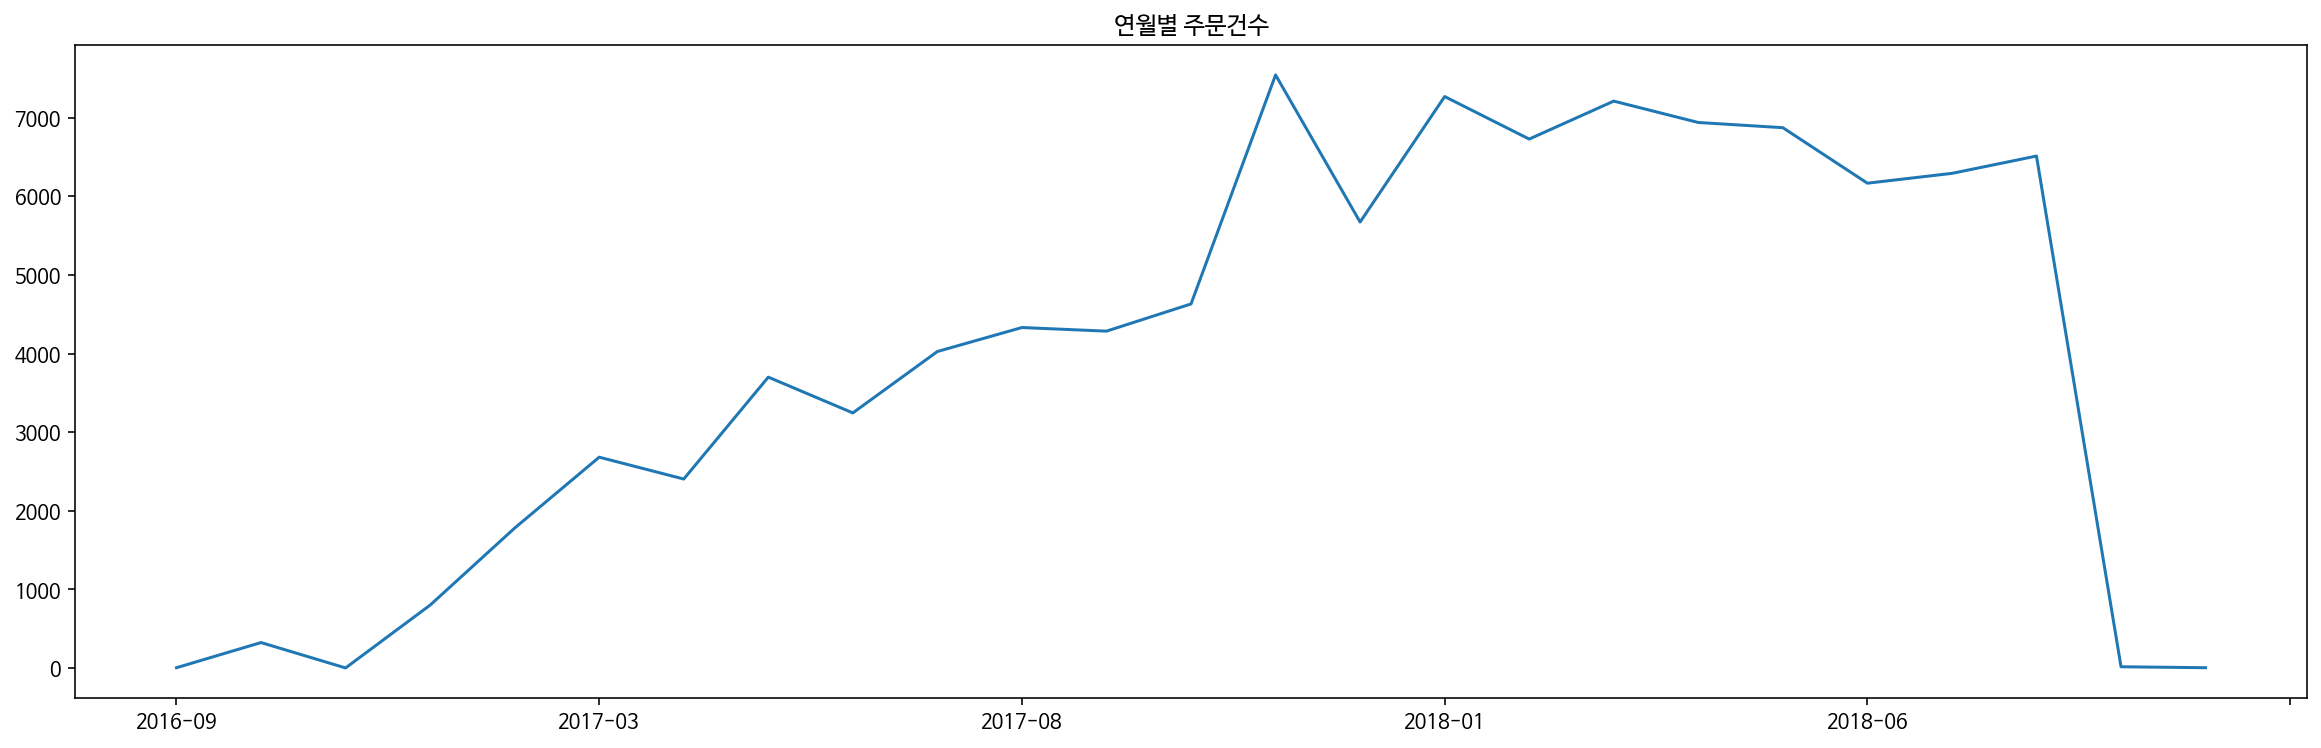

In [294]:
# 연월별 주문건수
orders['purchase_year_month'].value_counts().sort_index(ascending=True).plot(figsize=(20,6), title="연월별 주문건수")
plt.show()

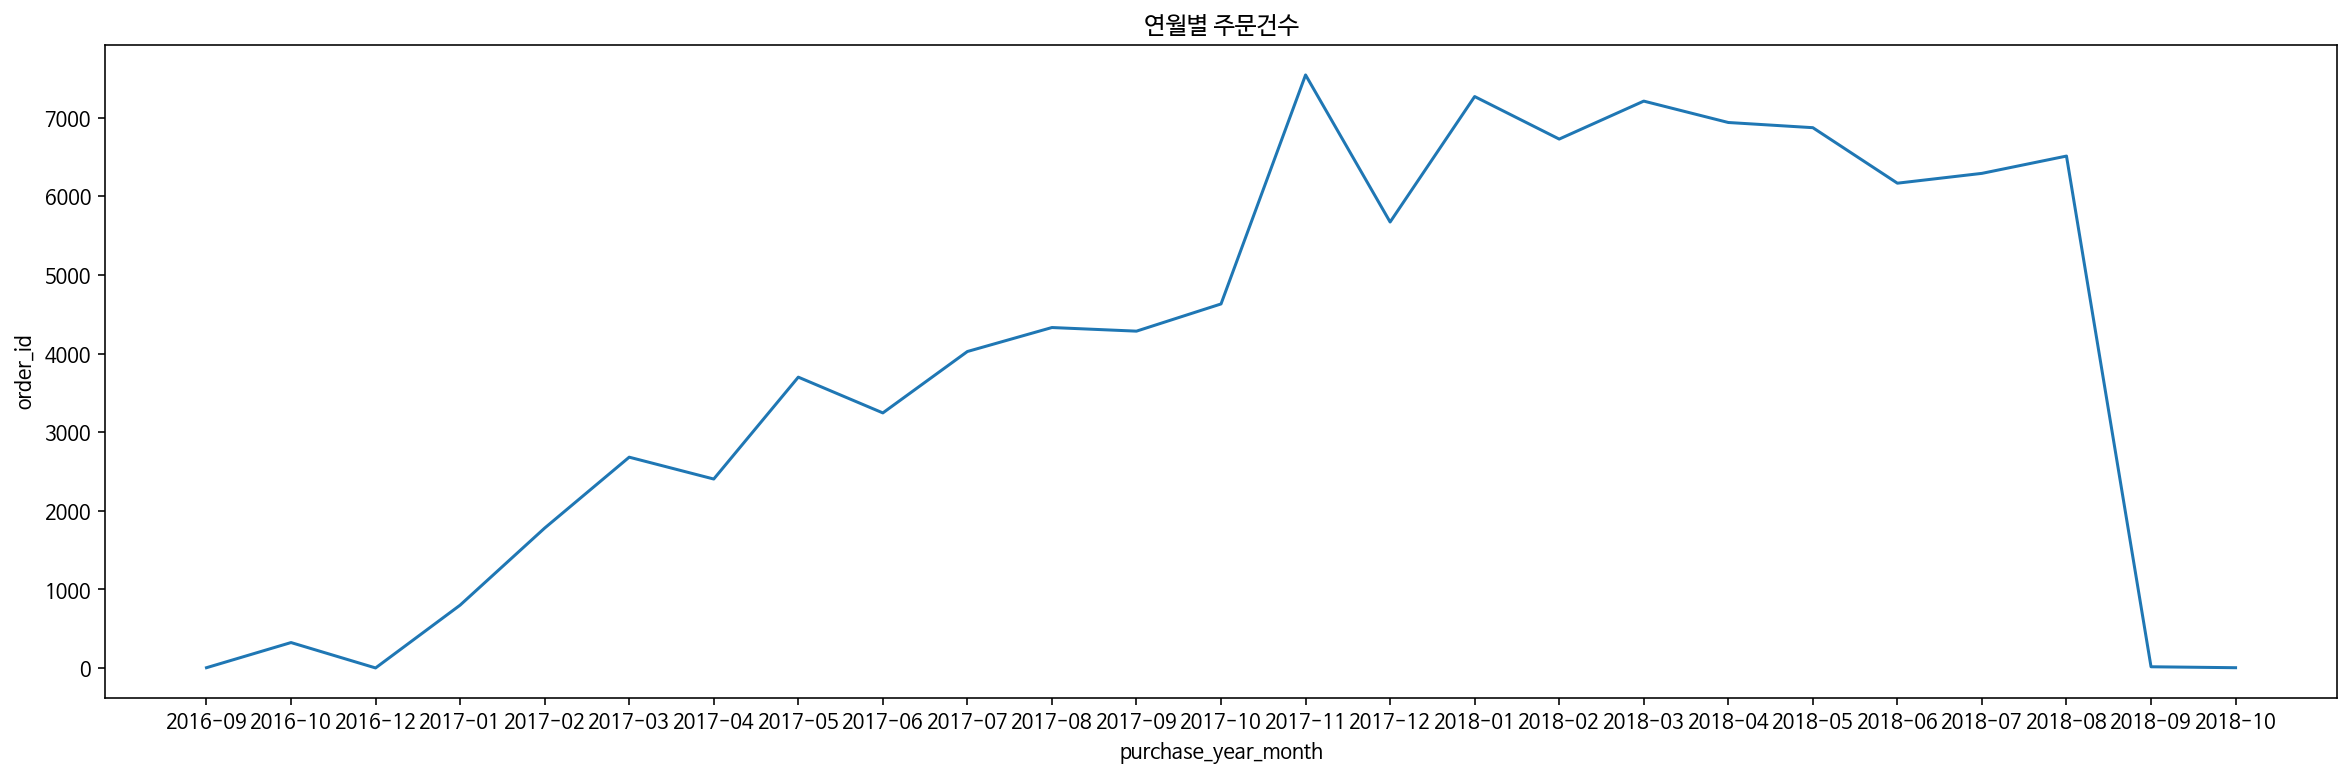

In [295]:
g = orders.groupby(['purchase_year_month'], as_index=False )['order_id'].count()

plt.figure(figsize=(20,6))
sns.lineplot(data=g, x='purchase_year_month', y='order_id')
plt.title('연월별 주문건수')
plt.show()

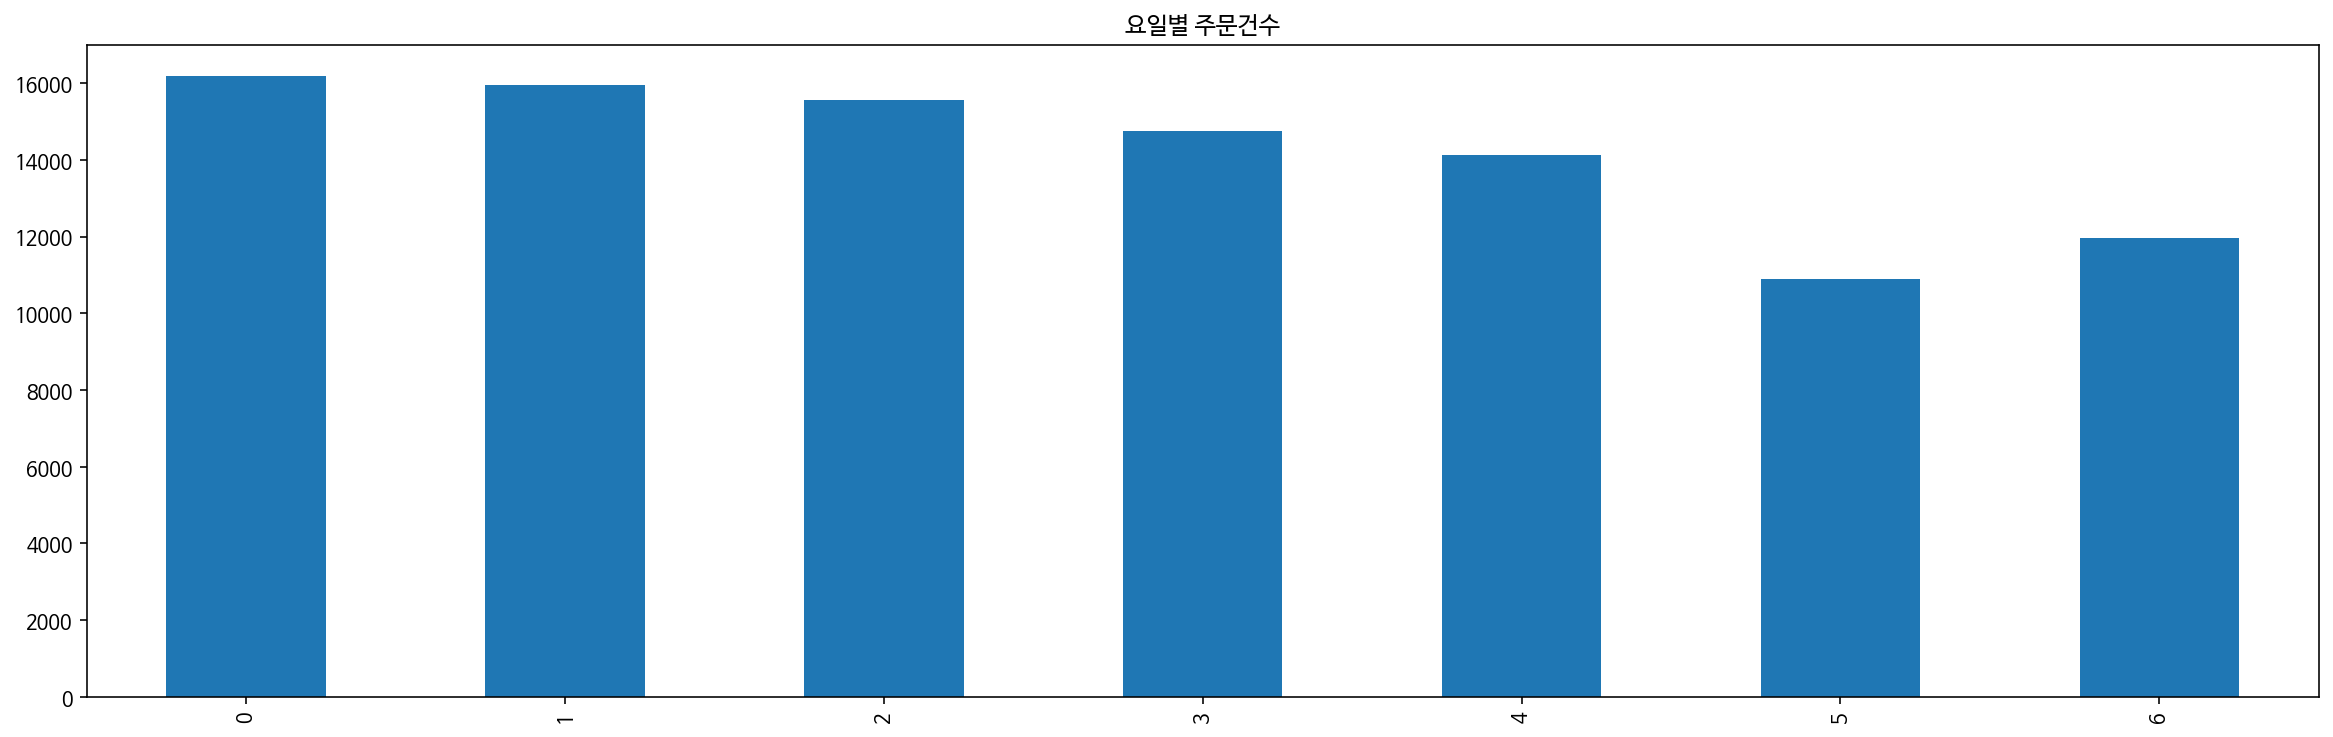

In [296]:
# 요일별 주문건수
orders['purchase_dow'].value_counts().sort_index(ascending=True).plot.bar(figsize=(20,6), title="요일별 주문건수")
plt.show()

주말(5,6)보다 평일의 평균 주문건수가 많은 것으로 보인다.

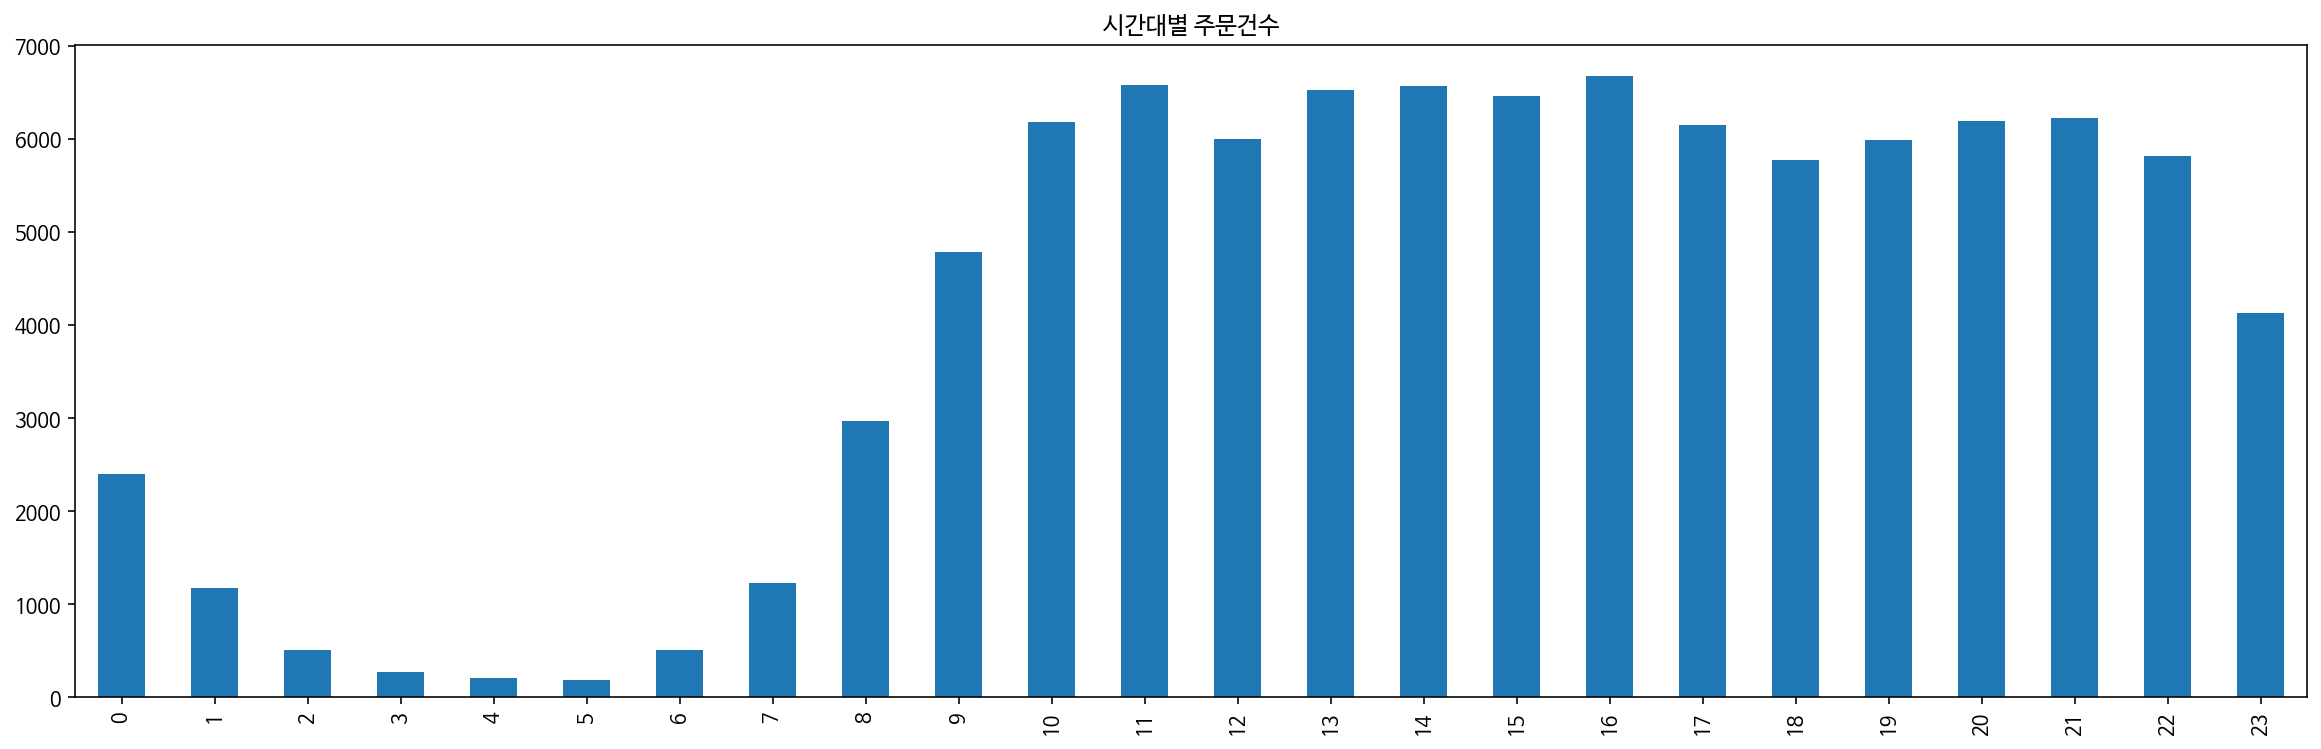

In [297]:
# 시간대별 주문건수
orders['purchase_hour'].value_counts().sort_index(ascending=True).plot.bar(figsize=(20,6), title="시간대별 주문건수")
plt.show()

- 요일별로 어떤 시간대에 주문을 많이 하는지 

### 주문관련 리드타임

In [298]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [299]:
# 주문승인 평균시간
orders_df['order_approved_leadtime'].mean()

10.068075046829142

주문승인 평균시간은 영업 중 주문건과 영업시간 외 주문건을 나눠서 보아야할 수도 있을 것 같다.

In [300]:
# 주문승인~발송시작 평균시간
orders_df['delivered_approved_leadtime'].mean()

66.86232112848195

In [301]:
# 발송시작 ~ 배송완료 평균시간
orders_df['delivered_leadtime'].mean()

223.52284441878686

평균 배송일이 거의 9~10일에 달한다. 한국과 비교하면 엄청난 배송시간이 소요된다.

### 리뷰 평점과 상관관계

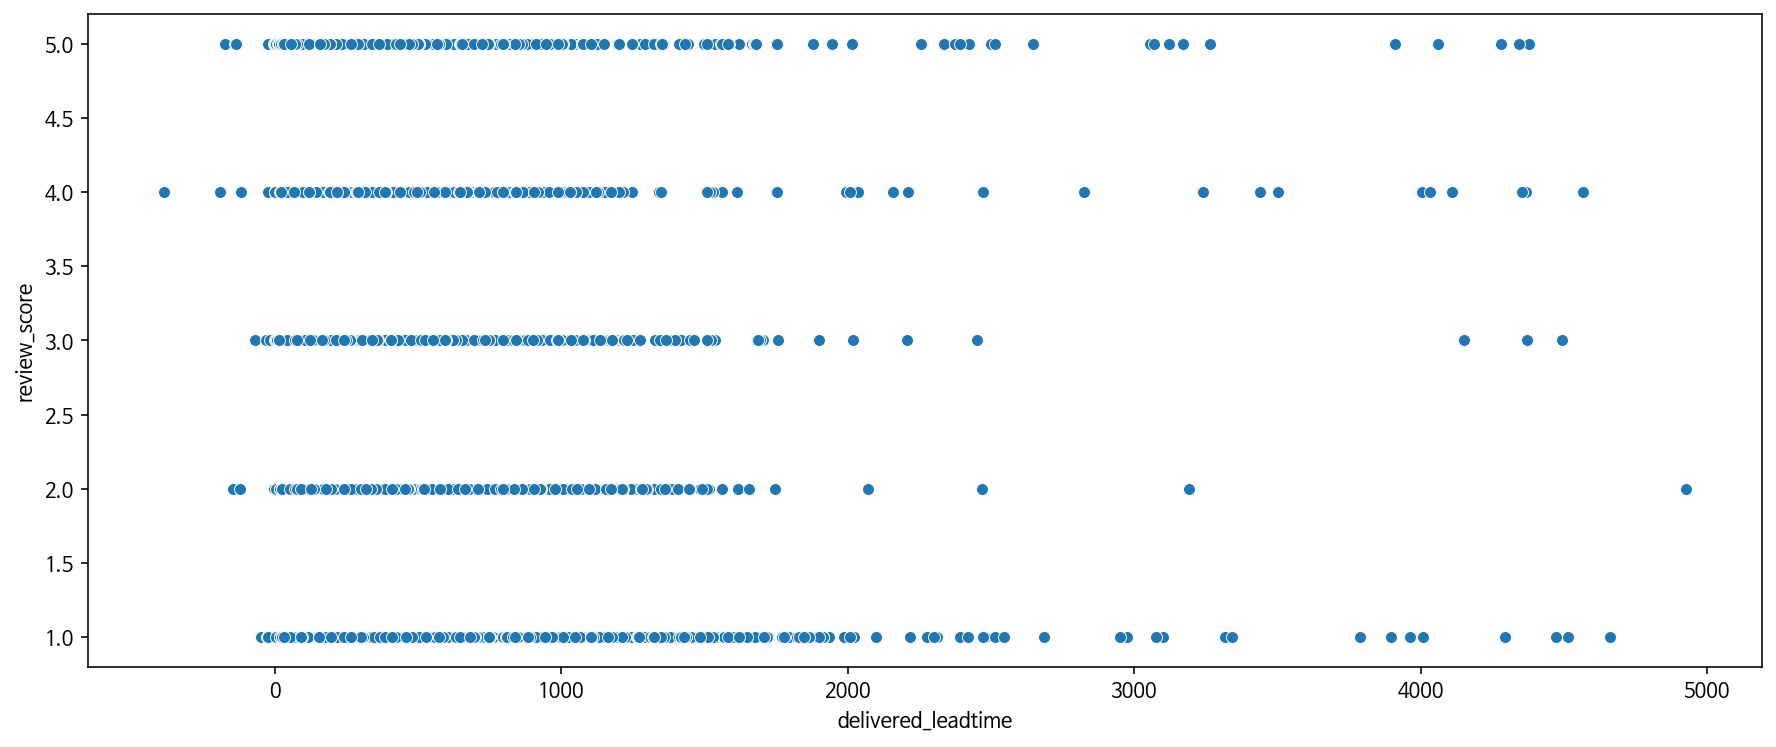

In [302]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=orders_df, x='delivered_leadtime', y='review_score')

### 구매횟수

In [303]:
payments['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [304]:
orders_df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1793
order_delivered_customer_date     2987
order_estimated_delivery_date        0
purchase_date                        0
purchase_year_month                  0
purchase_year                        0
purchase_month                       0
purchase_dow                         0
purchase_hour                        0
order_approved                     161
order_approved_leadtime            161
delivered_approved                1807
delivered_approved_leadtime       1807
delivered_finished                2988
delivered_leadtime                2988
payment_value                        1
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                

In [305]:
orders_df.loc[orders_df['payment_value'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30868,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2016-09-15 12:16:38,2016-09,2016,9,3,12,0 days,0.0,53 days 04:55:15,1276.0,1 days 14:35:45,38.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28


In [306]:
order_items[order_items['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


### 월별 주문금액 및 건수

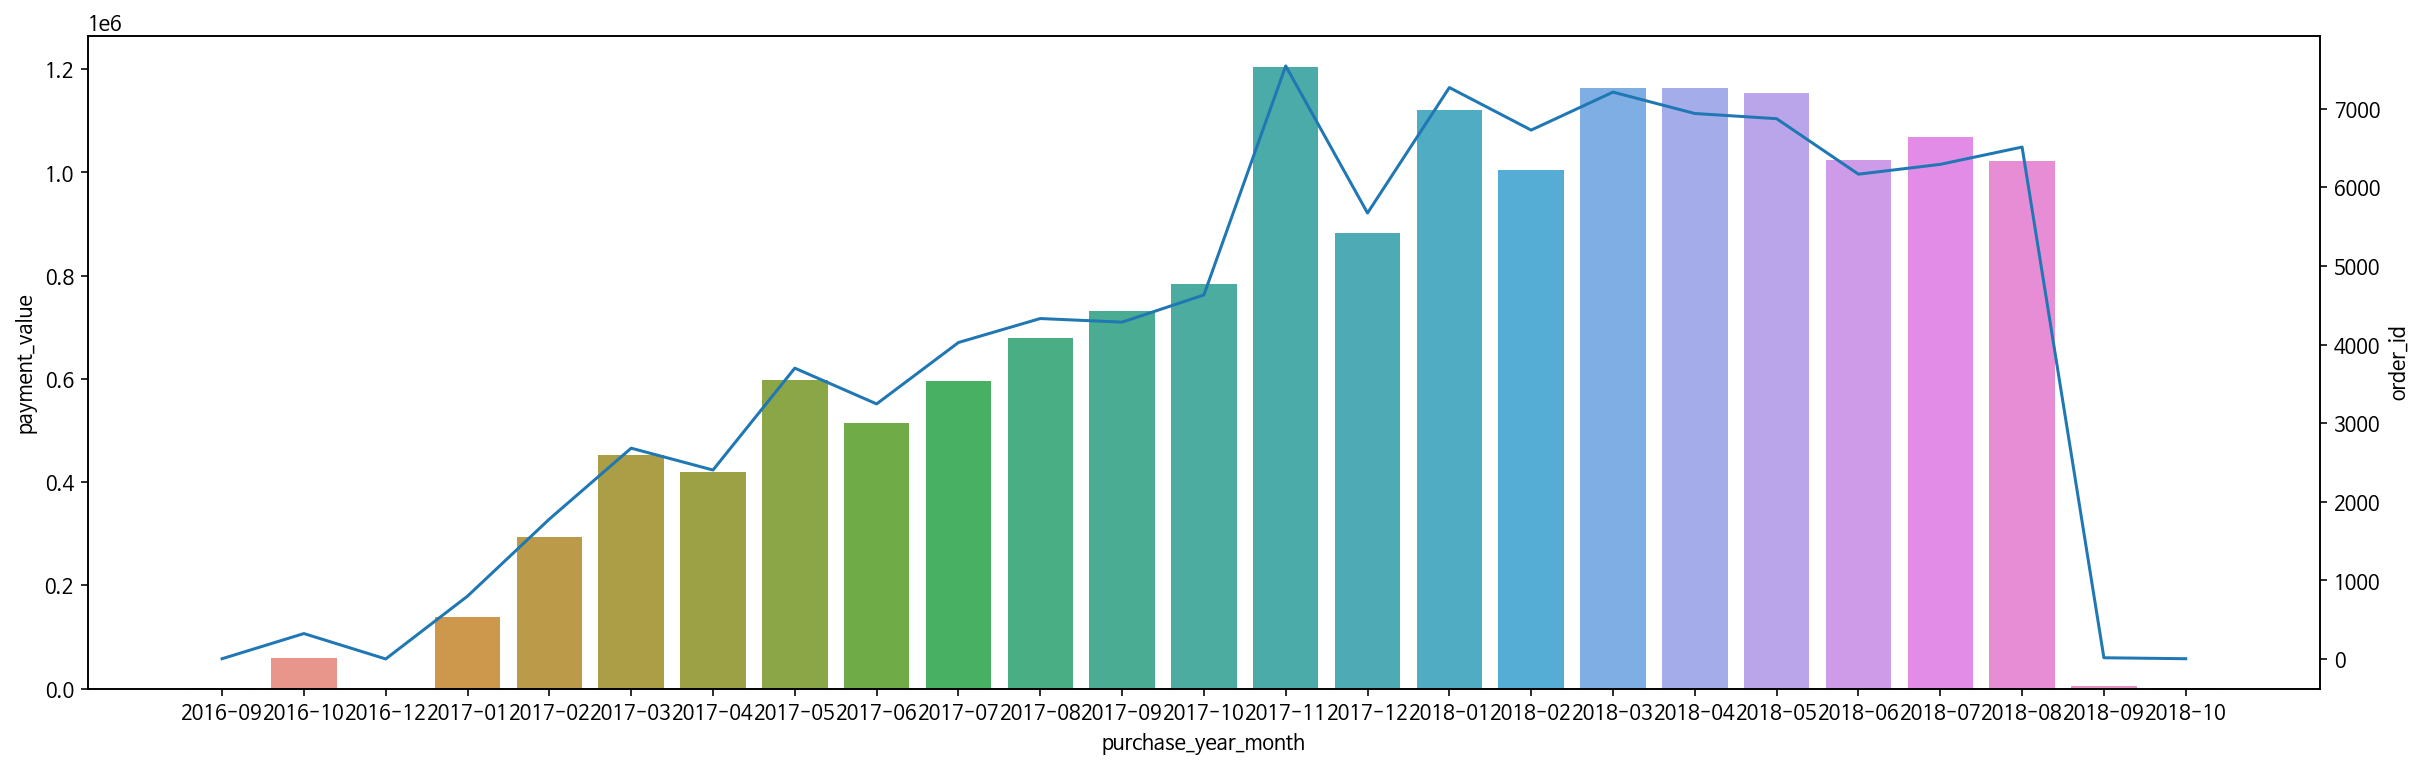

In [307]:
monthly_sales = orders_df.groupby(['purchase_year_month'], as_index=False)['payment_value'].sum()

fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = sns.barplot(data=monthly_sales, x='purchase_year_month', y='payment_value', ci=None)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=g, x='purchase_year_month', y='order_id')

plt.show()

### 결제수단 정보

In [308]:
payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

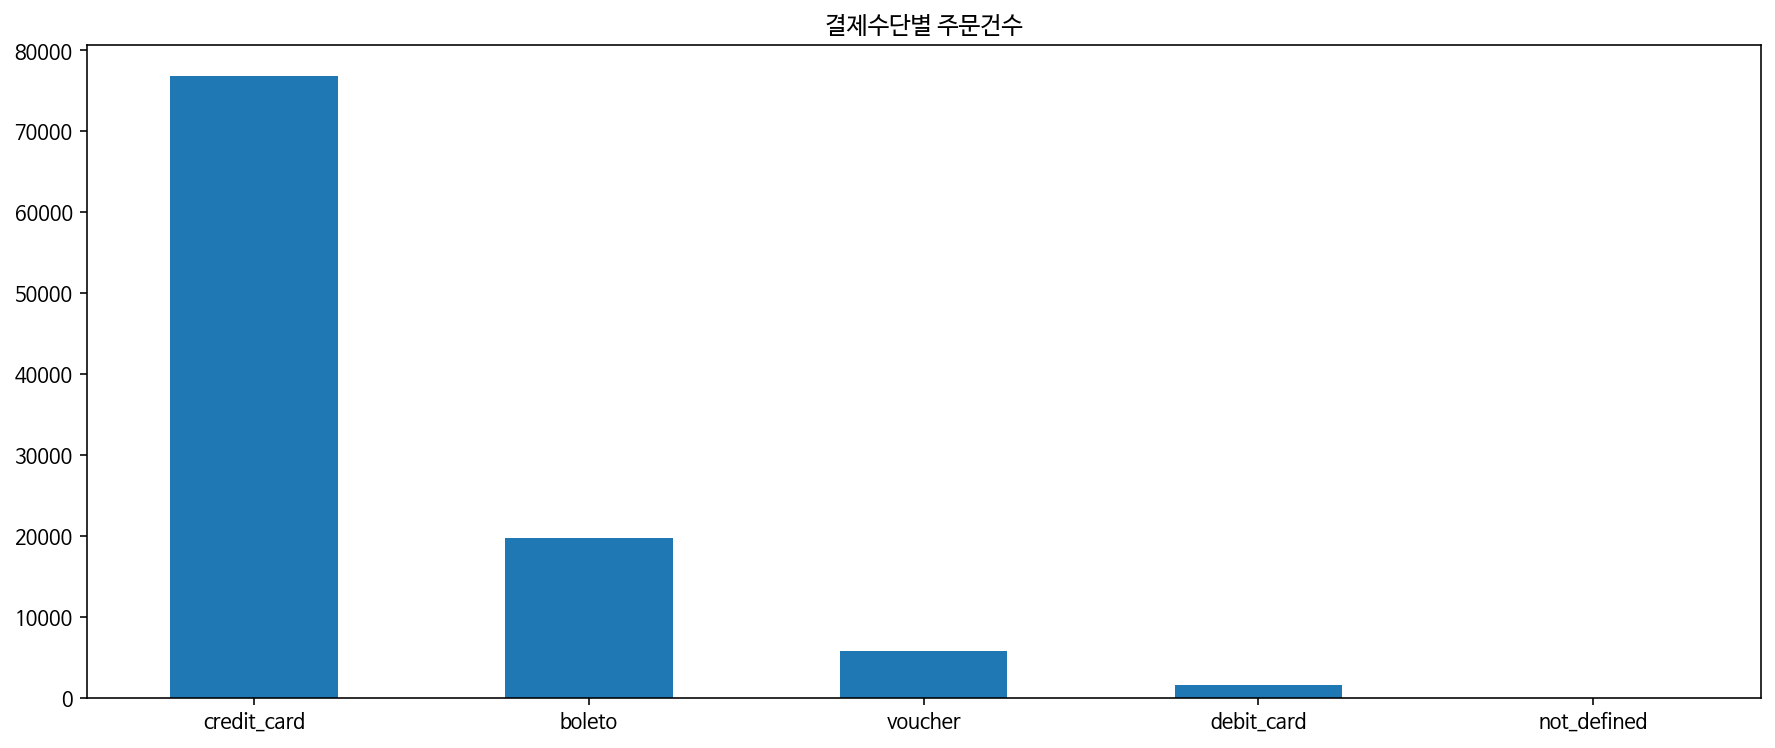

In [309]:
# 결제수단별 주문건수
payments['payment_type'].value_counts().plot.bar(figsize=(15,6))
plt.xticks(rotation=360)
plt.title('결제수단별 주문건수')
plt.show()

* boleto : 티켓

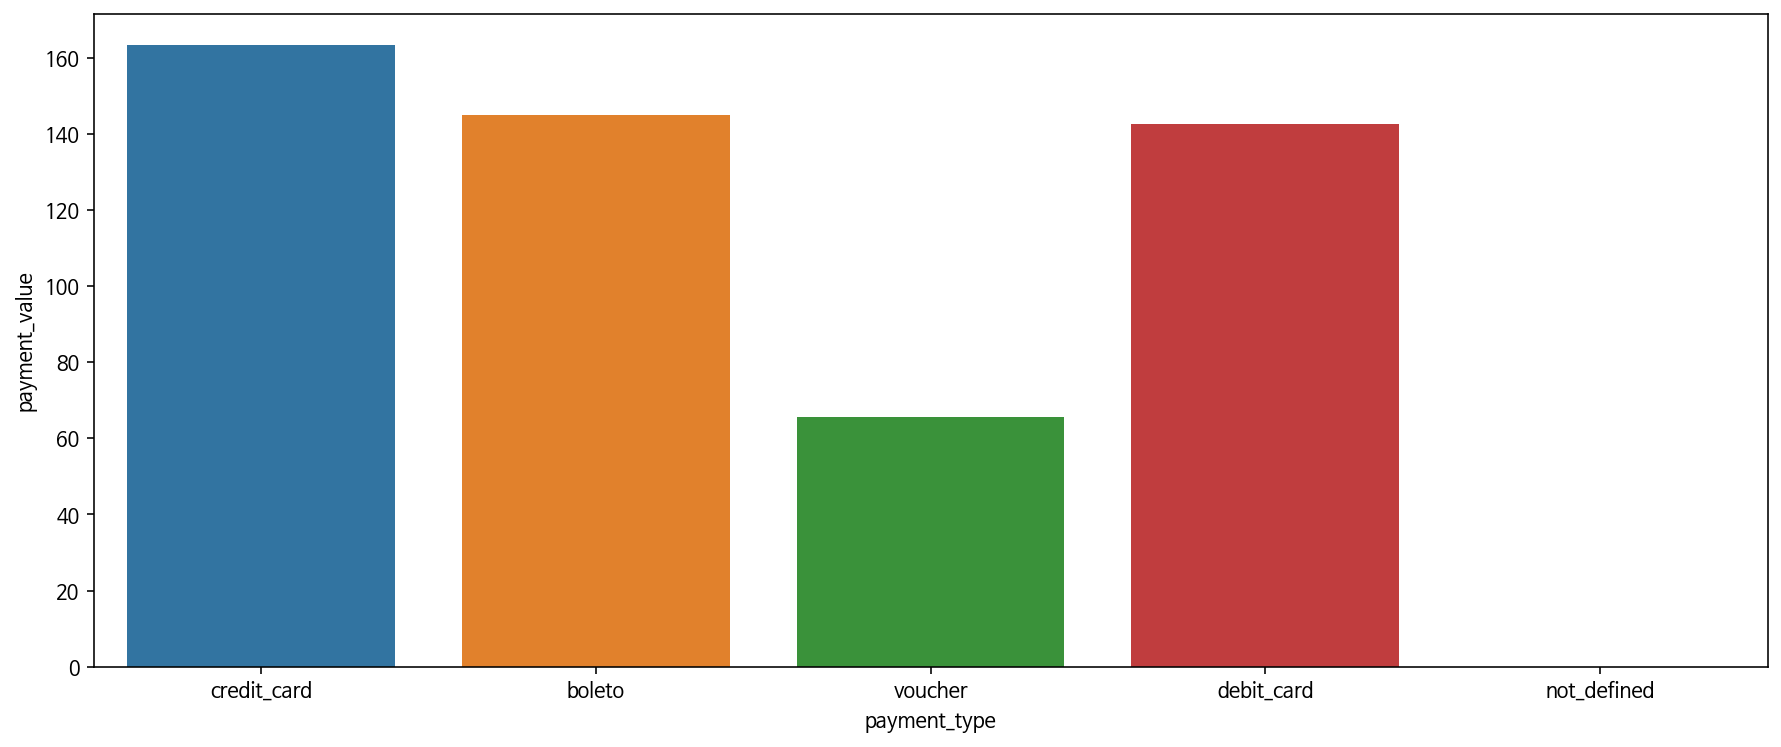

In [310]:
# 결제수단별 평균 주문금액
plt.figure(figsize=(15,6))
g = sns.barplot(data=payments, x='payment_type', y='payment_value', ci=None)

In [311]:
df = pd.merge(orders, payments, how='left', on='order_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0,1.0,credit_card,3.0,179.12


In [312]:
g = df.groupby(['purchase_year_month', 'payment_type'], as_index=False)['order_id'].count()
g.head()

,purchase_year_month,payment_type,order_id
0,2016-09,credit_card,3
1,2016-10,boleto,63
2,2016-10,credit_card,254
3,2016-10,debit_card,2
4,2016-10,voucher,23


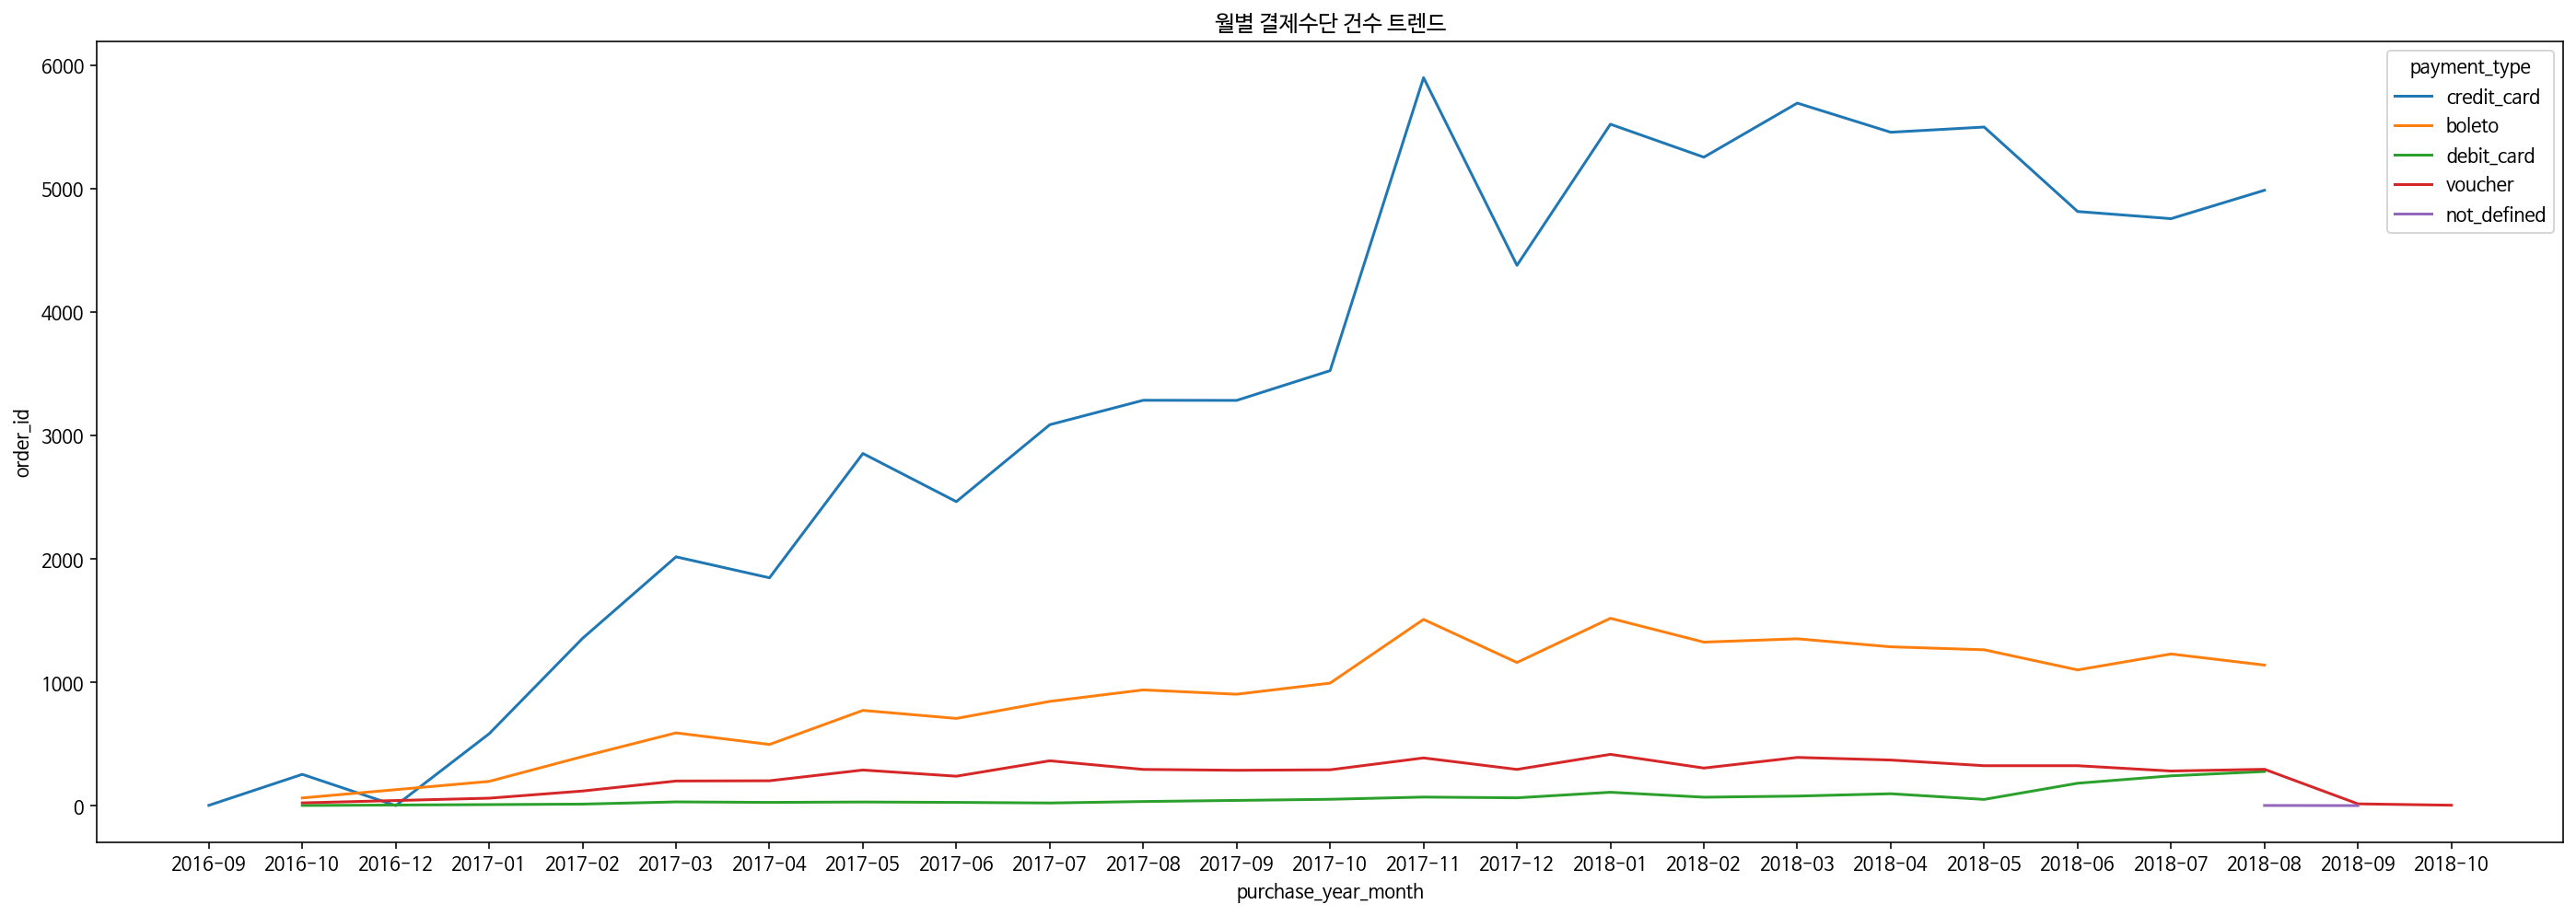

In [313]:
plt.figure(figsize=(24,8))
sns.lineplot(data=g, x='purchase_year_month', y='order_id', hue='payment_type')
plt.title('월별 결제수단 건수 트렌드')
plt.show()

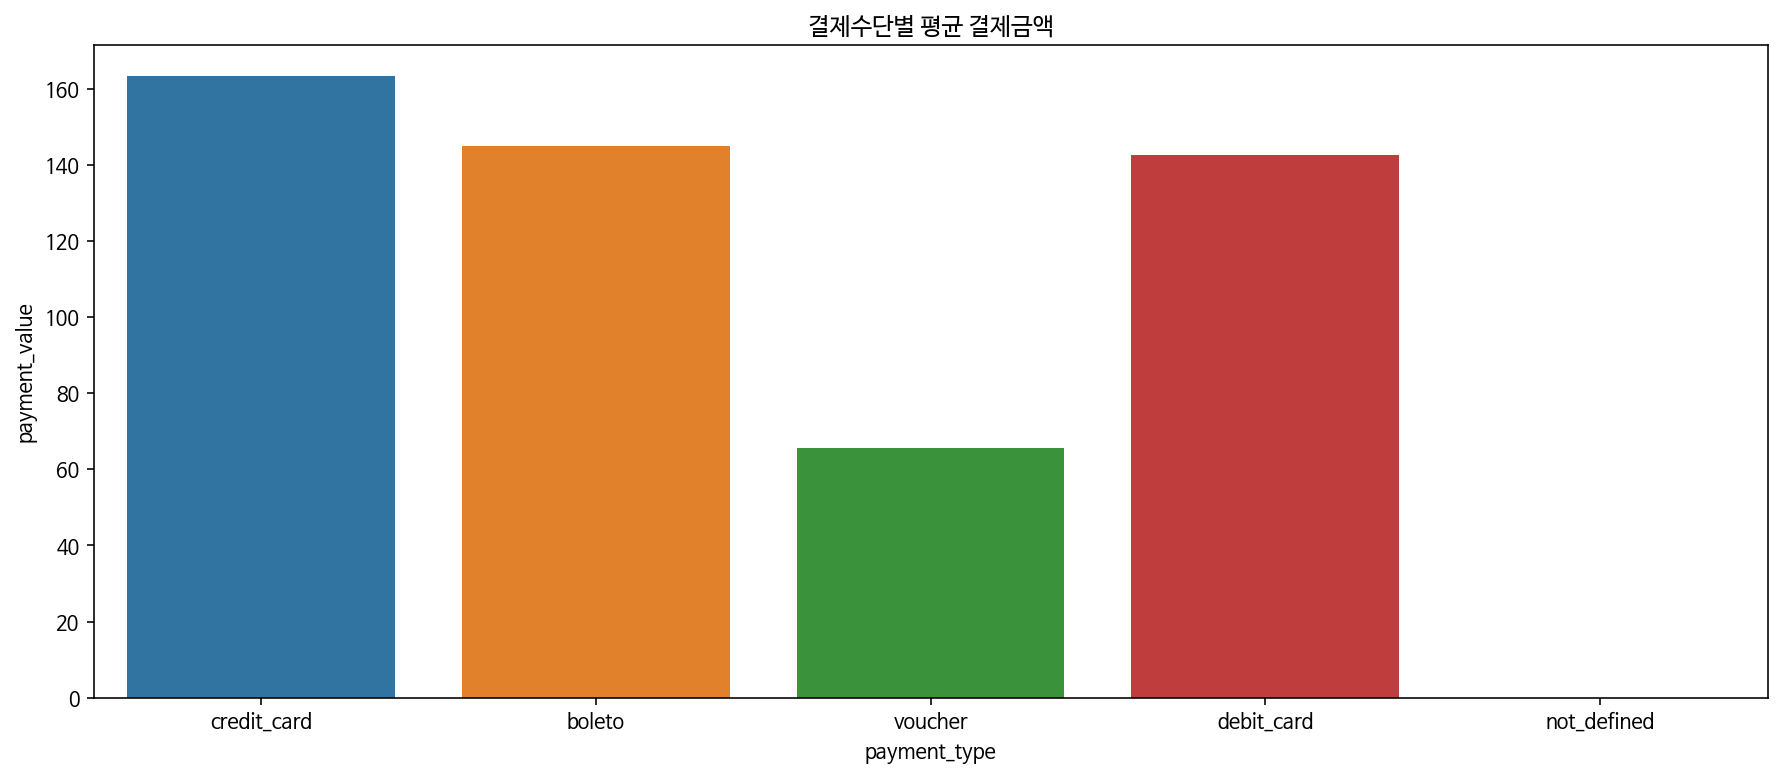

In [314]:
plt.figure(figsize=(15,6))
g = sns.barplot(data=payments, x='payment_type', y='payment_value', ci=None)
plt.title('결제수단별 평균 결제금액')
plt.show()

### 결제금액 분포

In [315]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [316]:
payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

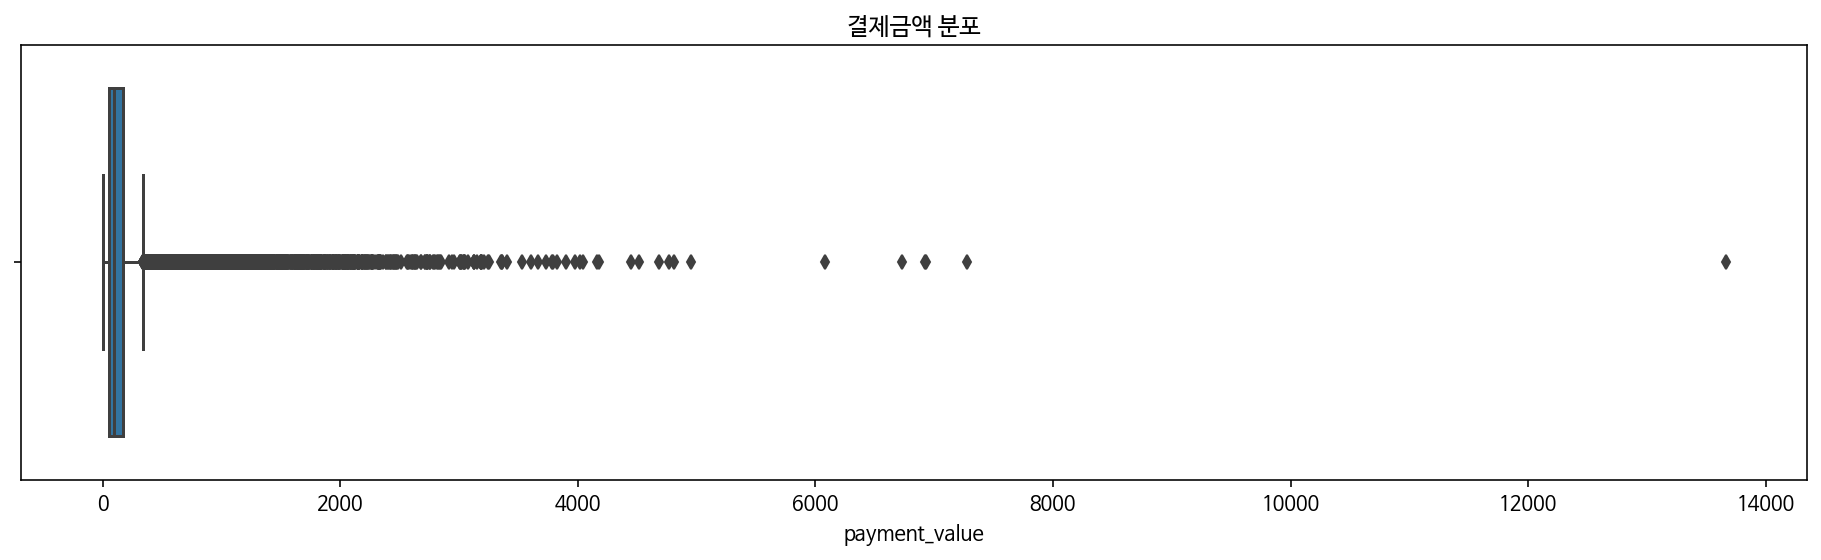

In [317]:
plt.figure(figsize=(16,4))
sns.boxplot(data=payments, x='payment_value').set_title('결제금액 분포')
plt.show()

In [318]:
cum_payment_value = payments['payment_value'].value_counts().sort_index().cumsum() / len(payments)
cum_payment_value

0.00        0.000087
0.01        0.000144
0.03        0.000164
0.05        0.000183
0.07        0.000193
              ...   
6726.66     0.999961
6922.21     0.999971
6929.31     0.999981
7274.88     0.999990
13664.08    1.000000
Name: payment_value, Length: 29077, dtype: float64

In [319]:
np.where(cum_payment_value <0.99)

(array([    0,     1,     2, ..., 28153, 28154, 28155]),)

### RFM 분석

In [321]:
max_date = orders_df['order_purchase_timestamp'].max()
max_date

Timestamp('2018-10-17 17:30:18')

In [322]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year_month,purchase_year,purchase_month,purchase_dow,purchase_hour,order_approved,order_approved_leadtime,delivered_approved,delivered_approved_leadtime,delivered_finished,delivered_leadtime,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10,2017,10,0,10,0 days 00:10:42,0.0,2 days 08:47:45,56.0,6 days 01:30:13,145.0,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07,2018,7,1,20,1 days 06:42:50,30.0,0 days 11:06:33,11.0,12 days 00:56:45,288.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08,2018,8,2,8,0 days 00:16:34,0.0,0 days 04:54:37,4.0,9 days 04:16:29,220.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11,2017,11,5,19,0 days 00:17:53,0.0,3 days 17:54:00,89.0,9 days 10:48:43,226.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02,2018,2,1,21,0 days 01:01:50,1.0,0 days 21:26:05,21.0,1 days 22:30:28,46.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03-09 09:54:05,2017-03,2017,3,3,9,0 days 00:00:00,0.0,1 days 01:23:58,25.0,7 days 03:49:58,171.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-06 12:58:58,2018-02,2018,2,1,12,0 days 00:11:39,0.0,1 days 10:12:05,34.0,20 days 18:15:14,498.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:

In [325]:
rfm = orders_df.groupby(['customer_unique_id'], as_index=False).agg(
    {'order_purchase_timestamp': lambda x:(max_date-pd.to_datetime(x.max())).days,
     'customer_id':'count',
     'payment_value':'sum'})

In [327]:
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

In [328]:
# Recency
rfm['recency']

0        160
1        163
2        585
3        369
4        336
        ... 
96091    495
96092    310
96093    617
96094    168
96095    532
Name: recency, Length: 96096, dtype: int64

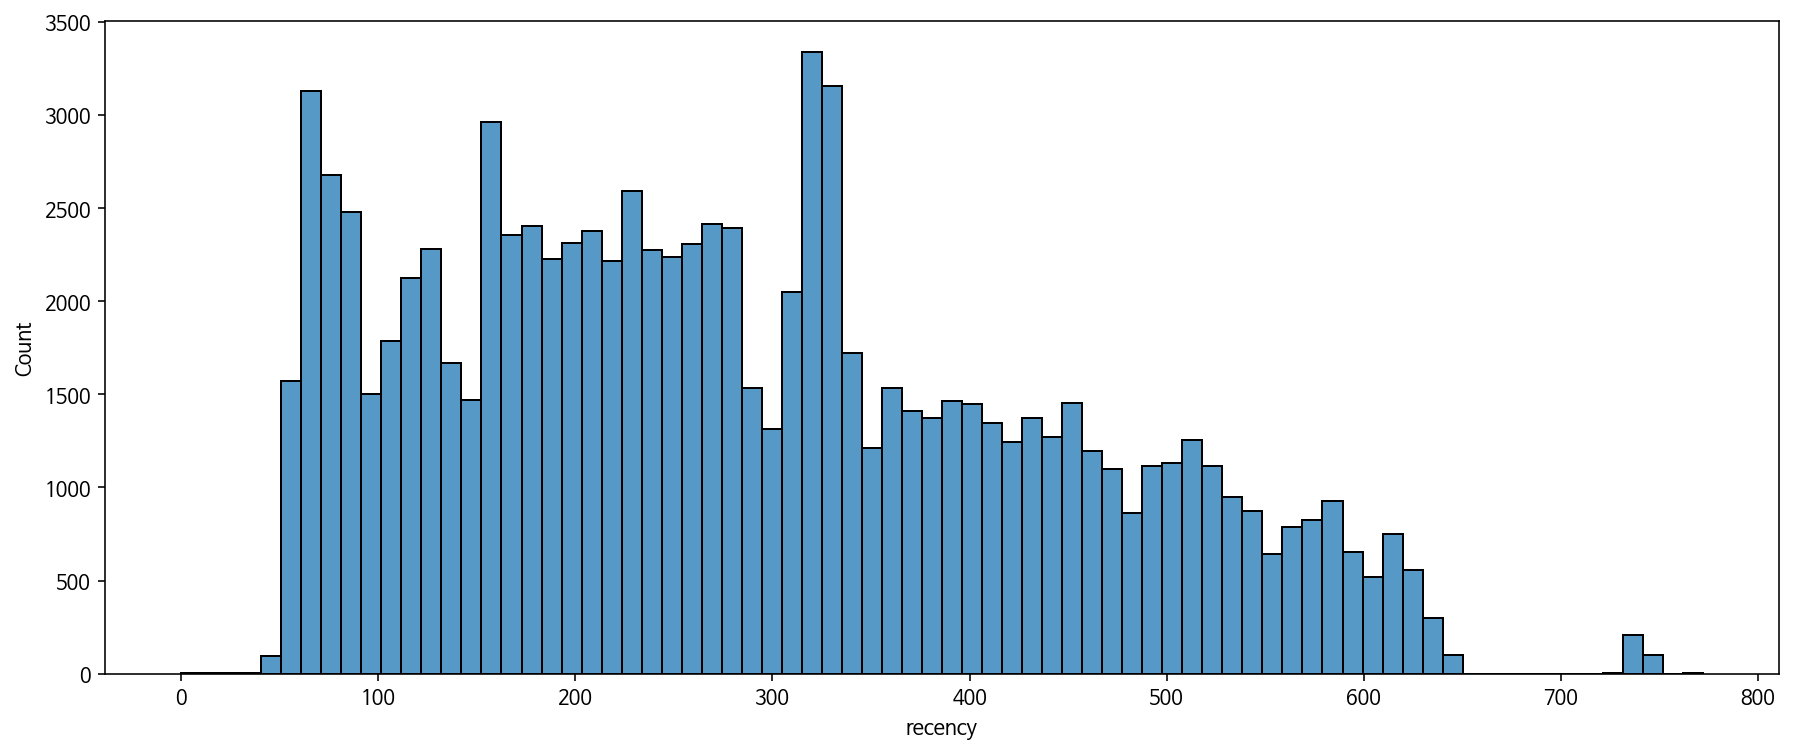

In [331]:
plt.figure(figsize=(15,6))
sns.histplot(rfm['recency'])

In [329]:
# Frequency
rfm['frequency'].describe()

count    96096.000000
mean         1.040543
std          0.255275
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: frequency, dtype: float64

In [330]:
# Monetary
rfm['monetary'].describe()

count    96096.000000
mean       167.347452
std        232.881954
min          0.000000
25%         63.160000
50%        108.155000
75%        184.072500
max      13664.080000
Name: monetary, dtype: float64

### 카테고리별 분석

In [129]:
products.head()

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [130]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_amount
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [142]:
# 데이터 merge
order_items_df = pd.merge(order_items, products, how='left', on='product_id')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_amount,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [143]:
temp = order_items_df.groupby('product_category_name_english', as_index=False)['product_id'].count().sort_values(by='product_id', ascending=False).head(10)
temp.head()

,product_category_name_english,product_id
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827


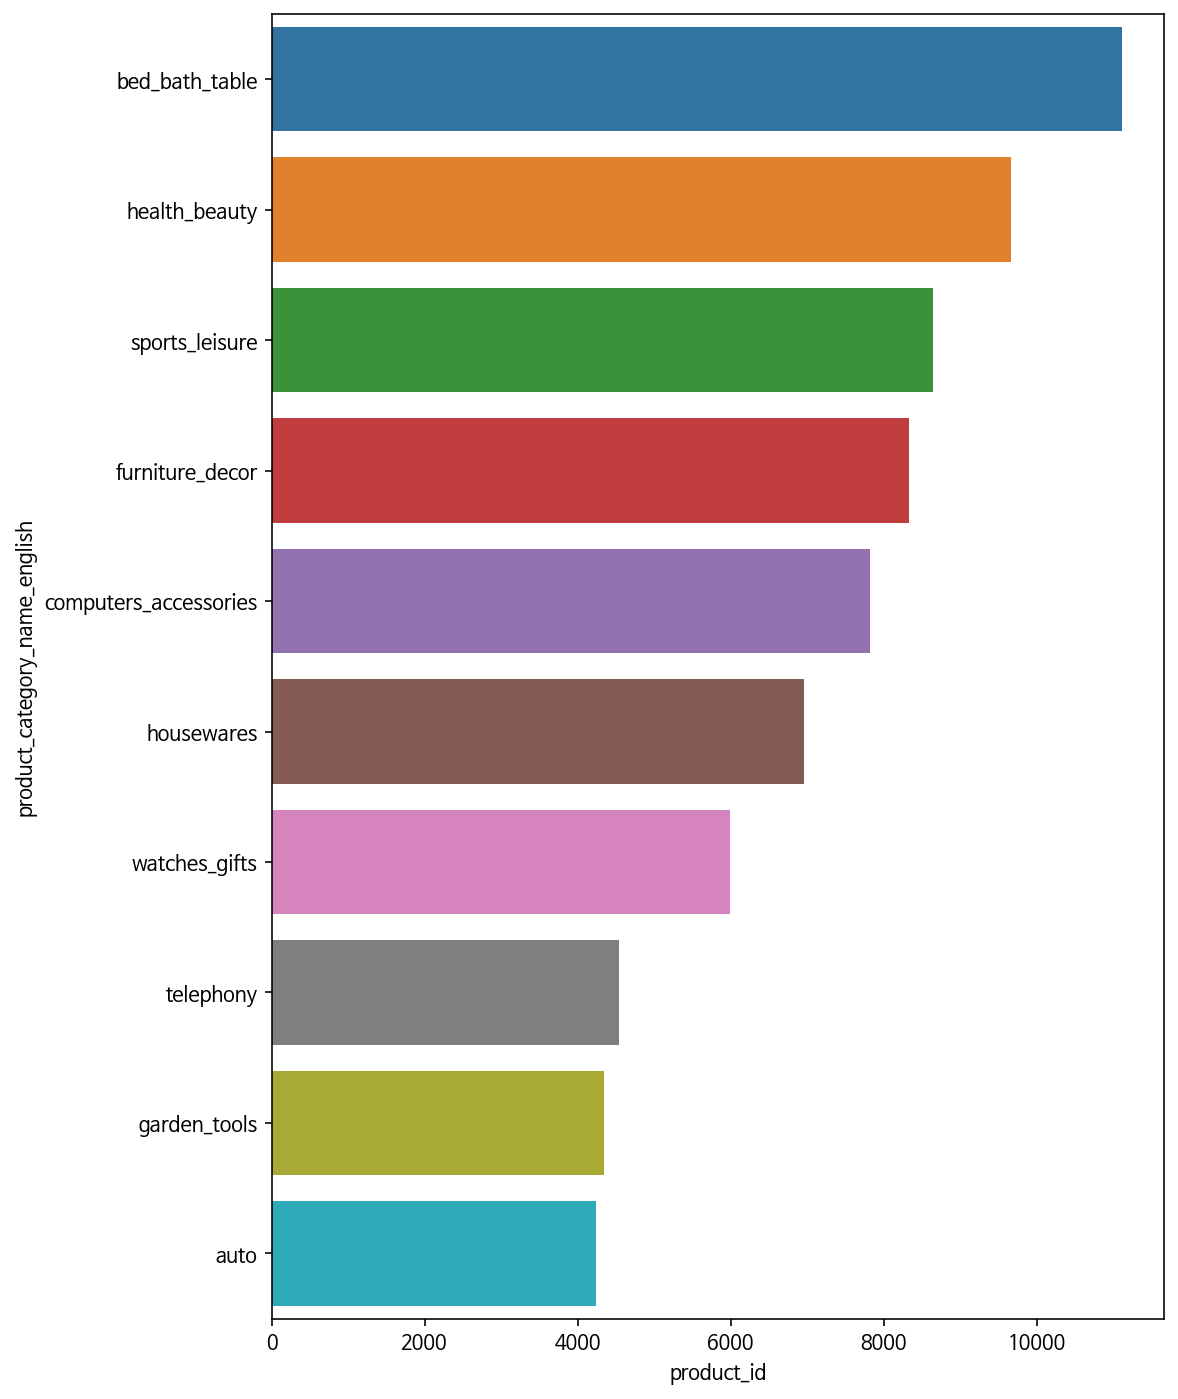

In [144]:
# 주문 카테고리 Top 10
plt.figure(figsize=(8,12))
sns.barplot(data=temp, y='product_category_name_english', x='product_id')

In [158]:
order_item_prod_info = pd.merge(order_items, products, how='left', on='product_id')
order_item_prod_info

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_amount,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [167]:
product_sales = order_item_prod_info.groupby(['product_category_name_english'], as_index=False)['total_amount'].sum().sort_values(by='total_amount', ascending=False).head(10)
product_sales.head()

,product_category_name_english,total_amount
43,health_beauty,1441248.07
70,watches_gifts,1305541.61
7,bed_bath_table,1241681.72
65,sports_leisure,1156656.48
15,computers_accessories,1059272.40


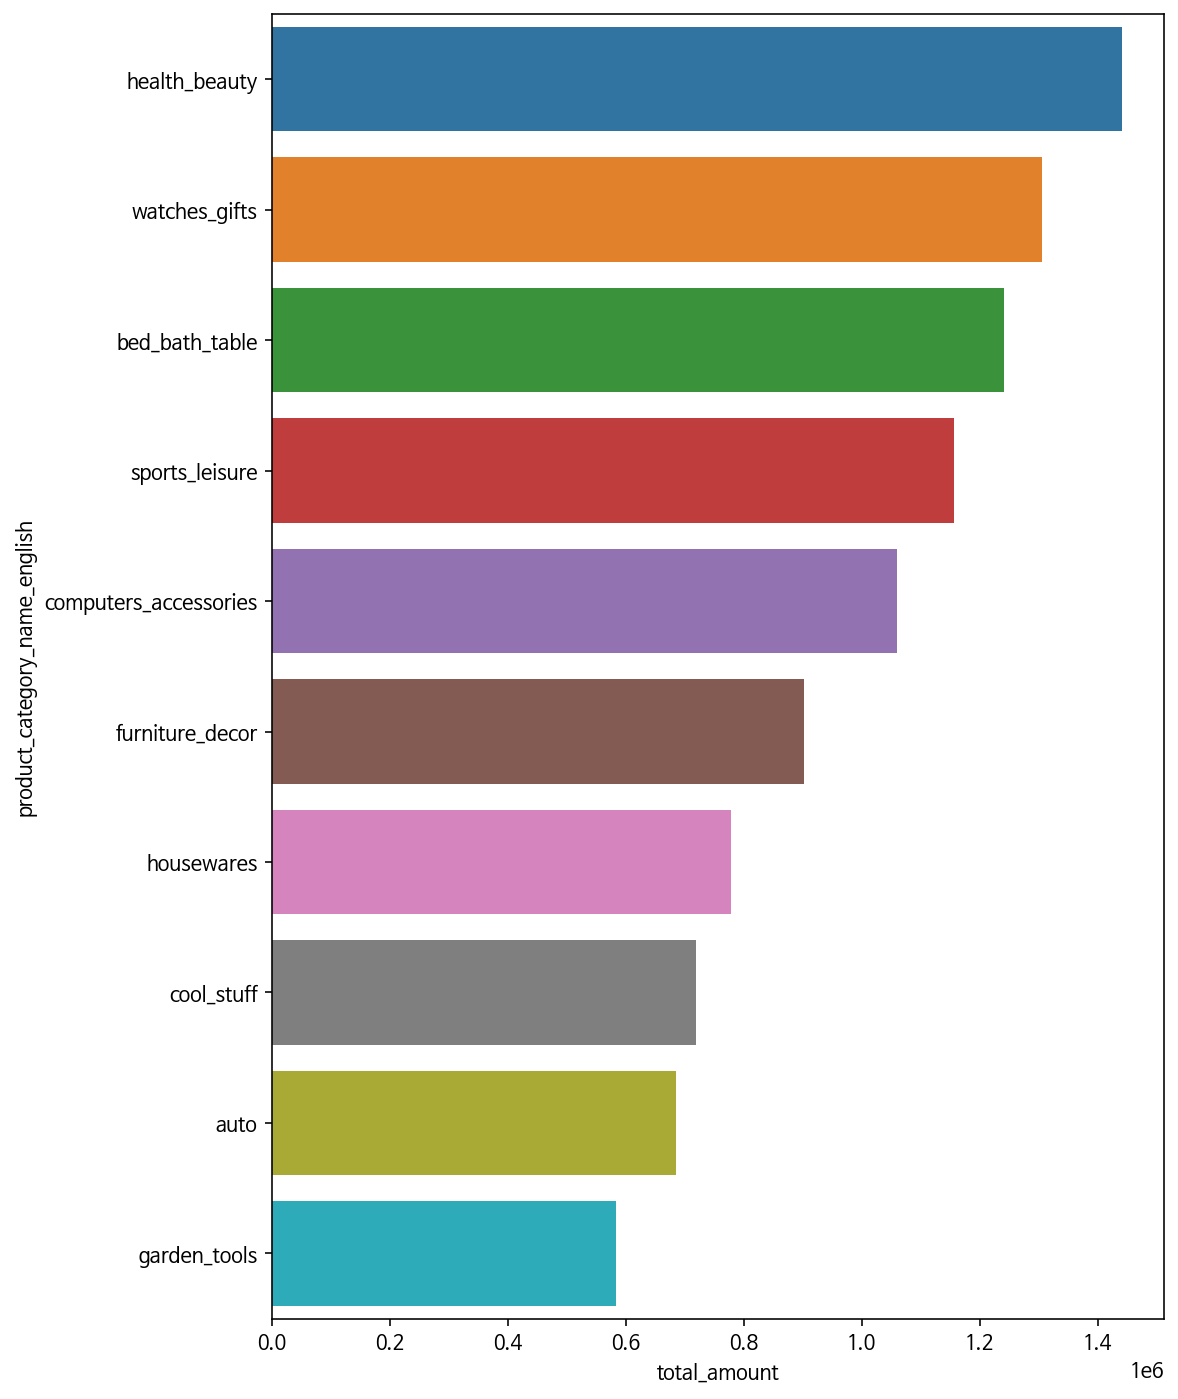

In [170]:
# 카테고리 주문금액 Top 10
plt.figure(figsize=(8,12))
sns.barplot(data=product_sales, y='product_category_name_english', x='total_amount', estimator=np.sum)